<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/PR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 3

##Introducción

Esta es la tercera práctica del tercer laboratorio. En esta práctica se clasifican imágenes. Las imáenes van a ser números escritos a mano y gracias a la clasificación.
Lo primero es cargar la base de datos con la que se va a trabajar, que es la de "load_digits" proporcionada por scikit-learn.

In [47]:
#Importamos las librerias necesarias
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
import math


from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Cargamos el dataset de la librería indicada.


Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 

##Comprensión de los negocios y definición del problema

El etiquetado de imágenes es una tarea ardua. Es por ello y también debido a sus aplicaciones prácticas que
los científicos llevan un tiempo intentando mejorar los métodos para clasificarlas automáticamente. En la
oficina de correos de Pozuelo de Alarcón quieren poner en práctica un modelo que clasifique las cartas según
el código postal escrito en ellas. Para ello vamos a crear un clasificador que leyendo un número escrito a mano
pueda saber cuál es. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un
plano que divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus
características.

Para ello usaremos el dataset “load_digits” que se encuentra en scikit-learn. Elige el clasificador que más se
adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las
siguientes cuestiones.

1) Crea un clasificador que permita saber qué número es a partir de una imagen de este. Realiza al
menos dos configuraciones y dibuja una tabla donde se muestre la precisión con la que clasifican.


2) Elige 5 números que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas.
Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error ha
funcionado el clasificador. 


## Comprensión de los datos

El dataset que hemos descargado me devuelve un diccionario que contiene las siguientes claves:

- Data: una matriz de tamaño (nº muestras, nº características) que contiene las imágenes de los dígitos.
- Target: una matriz de tamaño (nº muestras), que contiene las etiquetas de los dígitos, es decir, los números que representan.
- Target_names: una matriz de tamaño (nº clases), que contiene los nombres de las etiquetas, es decir, los números que representan.
- Images: una matriz de tamaño (nº 
muestras, altura, anchura) que contiene las imágenes de los dígitos en forma de matriz.
- DESCR: una cadena de texto que describe el conjunto de datos.


##Preparación de los datos

Primero se inspeccionan un poco más los datos.

Se puede ver el tamaño del conjunto de datos, los nombres de las características, los valores de las características y los valores objetivo. 


In [48]:
print(digits.data.shape)
print(digits.feature_names)

(1797, 64)
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


Esto indica que hay 1797 imágenes y cada imagen está representada por un vector de 64 características.

Se ve si en el diccionario hay NaN

In [49]:
if any([any([val != val for val in row]) for row in digits.data]):
    print("Hay valores NaN en el conjunto de datos.")
else:
    print("No hay valores NaN en el conjunto de datos.")

No hay valores NaN en el conjunto de datos.


Ahora se ve que en el diccionario no hay valores vacíos.

Se visualizan los datos para tener una mejor comprensión de los mismos. Por ejemplo, se pueden trazar algunos ejemplos de imágenes para ver cómo se ven las imágenes y cómo están etiquetadas. 

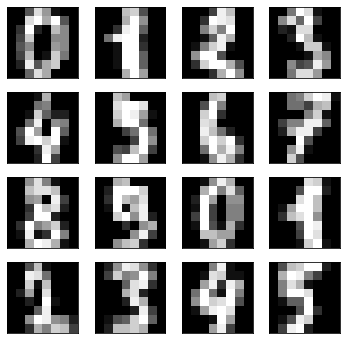

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.data[:16][i].reshape(8, 8), cmap='gray')
  ax.set(xticks=[], yticks=[])
plt.show()



Se observamos que estas imágenes, al igual es un poco confusa de reconocer, pero se diferencia perfectamente los números que se muestran (0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5) además se ve que las imágenes están en orden.

#Modelado

Para aplicar este paso de la metodología CRISP-DM se aplica

RELLENAR

In [68]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [69]:
len(X_train)

1437

In [70]:
len(y_train)

1437

In [71]:
indicesacomprobar =  np.random.randint(low=0, high=1437, size=5)
indicesacomprobar

array([ 542,  634, 1107,  765,  640])

El conjunto definitivo quitando las 5 imágenes que depsues comprobamos

In [72]:
X_train = np.delete(X_train, indicesacomprobar, axis=0)
y_train = np.delete(y_train, indicesacomprobar, axis=0)

In [73]:
len(X_train)

1432

In [74]:
len(y_train)

1432

Se utiliza la técnica KNN y se entrenan los clasificadores.

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Probamos: K=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

#Probamos: K=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

KNeighborsClassifier()

Se ve la precisión

In [76]:
from sklearn.metrics import accuracy_score

y_pred3 = knn3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

y_pred5 = knn5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)

print("Precisión (K=3): {:.2f}".format(accuracy3))
print("Precisión (K=5): {:.2f}".format(accuracy5))

Precisión (K=3): 0.98
Precisión (K=5): 0.99


Para clasificar las imagenes se elige un modelo, en este caso se elige el clasificador (KNN) en concreto el k=5 porqur tiene más precisión que k=3

In [77]:
import pickle

#Cargamos el modelo
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn5, f)

Se eligen 5 imágenes al azar que no se hayan usado ni para entrenar ni para evaluar. Se puede utilizar una función de la librería matplotlib.

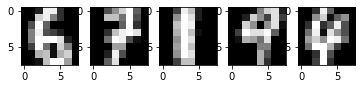

In [80]:
comprobar = digits.data[[ 542,  634, 1107,  765,  640]]

fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(comprobar[i].reshape(8, 8), cmap='gray')
plt.show()

In [81]:
prediccion = knn5.predict(comprobar)

# Mostramos las predicciones
print(prediccion)

[6 7 1 9 4]
